In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
%matplotlib inline

<p>The traditional NDAI is computed as follow:</p>
$$
NDAI_{ijk} = \alpha\cdot NVAI_{ijk} - (1-\alpha)\cdot NTAI_{ijk}
$$<p>Where $NDAI_{ijk}$ is the NDAI-value for pixel $i$ during day $j$ for year $k$. $NVAI_{ijk}$ is the NVAI-value for pixel $i$ during day $j$ for year $k$, $NTAI_{ijk}$ is the NTAI-value for pixel $i$ during day $j$ for year $k$ and $\alpha$ is used to set the importance of each separated condition index and should have a value between $0$ and $1$ and is normally set to $0.5$.</p>

<p>The elevation corrected NDAI, NDAI-DEM is computed as follow:</p>
<p>
$$
\DeclareMathOperator\erf{erf}
NDAI\text{-}DEM_{ijk} = \alpha\cdot NVAI_{ijk} - (1-\alpha)\cdot NTAI_{ijk} \cdot -\erf(DEM_{norm})
$$
</p><p>Where $NDAI\text{-}DEM_{ijk}$ is the NDAI-DEM-value for pixel $i$ during day $j$ for year $k$. $NVAI_{ijk}$ is the NVAI-value for pixel $i$ during day $j$ for year $k$, $NTAI_{ijk}$ is the NTAI-value for pixel $i$ during day $j$ for year $k$ and $\alpha$ is used to set the importance of each separated condition index and should have a value between $0$ and $1$ and is normally set to $0.5$.
</p>
$\erf()$ is defined as the error function of sigmoid shape defined as:
<p>
$$ 
\erf(DEM_{norm}) = \frac{2}{\sqrt{\pi}}\int_0^{DEM_{norm}} \! e^{-t^2} \, \mathrm{d}x
$$
</p>
and the $DEM_{norm}$ is the normalised digital elevation model (DEM) computed in two-steps as follow:<br>
<p>
$$
N_{DEM} = \frac{DEM - DEM_{Med}}{\max{DEM} - \min{DEM}}
$$
</p>
<p>
where $DEM_{Med}$ is the median of $DEM$ and $\max{DEM}$ and $\min{DEM}$ the maximum and minimum respectively. The resulting $N_{DEM}$ is scaled between $-3$ and $3$ to follow the appropriate shape of the error function:<br>
</p>
<p>
$$
DEM_{norm} = \frac{(c-b)(N_{DEM} - \min{N_{DEM}})}{\max{N_{DEM}} - \min{N_{DEM}}} + b
$$
</p>
where $b$ is $-3$ and $c$ is $3$

In [2]:
def errorfunction(x):
    a = []
    for item in x:
        a.append(-1*math.erf(item))
    return a

def erf(x):
    return -1*math.erf(x)

In [4]:
x = np.arange(-3., 3., 0.1)
erfP = errorfunction(x)

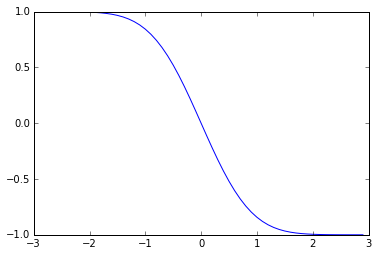

In [5]:
plt.plot(x,erfP)
plt.show()

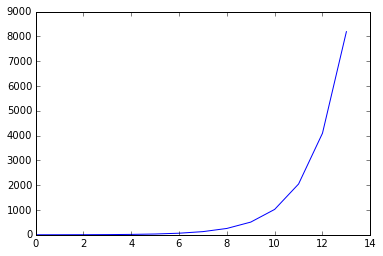

In [6]:
dem = np.array([1,2,4,8,16,32,64,128,256,512,1024,2048,4096,8192])
plt.plot(dem)

In [7]:
normed = (dem - np.median(dem)) / (dem.max() - dem.min())
b = -3
c = 3
outputX = (((c-b)*(normed - normed.min())) / (normed.max() - normed.min())) + b

In [8]:
a = 0.5
NVAI = -0.8
NTAI = -0.75
NDAI_DEM = []
NDAI = []
for NDEM in outputX:
    #print i
    NDAI_DEM.append(a * NVAI - (1-a) * NTAI * erf(NDEM))
    NDAI.append(a * NVAI - (1-a) * NTAI)
print NDAI_DEM
print NDAI

[-0.025008283936374498, -0.025008322272212613, -0.02500839945104516, -0.02500855585708378, -0.02500887702296556, -0.025009554090304142, -0.025011058363661187, -0.025014768110567576, -0.02502600905419161, -0.025076720828514254, -0.025546804499557707, -0.03768608837891735, -0.3998450217914514, -0.7749917160636255]
[-0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022, -0.025000000000000022]


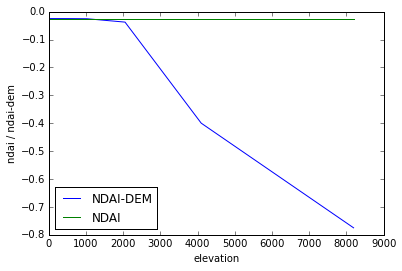

In [9]:
plt.plot(dem,NDAI_DEM, label="NDAI-DEM")
plt.plot(dem,NDAI, label="NDAI")
plt.xlabel('elevation')
plt.ylabel('ndai / ndai-dem')
plt.legend(loc=3)